# SteamDB Data Analysis on Top 10 Games with All-time Highest Conccurent Player Count

I like video games. As someone who mostly play video games on my PC, I use Steam frequently to get most of my games I played, and even then there are countless of games available on Steam - most of which I have not tried or even heard of. In this notebook, we are going to take a look on some data from SteamDB (a third-party site containing data scraped from Steam). There are no specific goals on this project, but I often find that having no specific goals when first analyzing a dataset allows me to have a broader view and more chances to gain unique insights.

For now, let us take a look into some data related to Steam, see what we can find, and decide where to go from there.

DISCLAIMER: This is meant to be a showcase/example analysis, any conclusion made should be taken with a grain of salt.

In [1]:
#import all necessary libraries to conduct this analysis - just the basics

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Sourcing The Data

SteamDB allows us to compare data from 10 games and export the data into csv format. We will take a look at the player count data for the top 10 games with highest concurrent player count (which is the number of players playing the game at the same time).

In [2]:
# Import the csv file, which has been uploaded to github
url = "https://raw.githubusercontent.com/mezkymy/SteamDBAnalysis/main/chart_data.csv"
player_count = pd.read_csv(url, parse_dates=['DateTime'])
player_count

,DateTime,Dota 2,Counter-Strike: Global Offensive,PUBG: BATTLEGROUNDS,Valheim,New World,Cyberpunk 2077,Apex Legends,ELDEN RING,Goose Goose Duck,Lost Ark
0,2011-09-22,194.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011-09-23,240.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-09-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-09-25,233.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-09-26,222.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4097,2022-12-10,761890.0,1001231.0,481212.0,113535.0,59505.0,42021.0,367328.0,46193.0,147741.0,305759.0
4098,2022-12-11,775047.0,972857.0,469900.0,127691.0,64919.0,44775.0,341342.0,47045.0,152030.0,322463.0
4099,2022-12-12,677299.0,856206.0,436722.0,95400.0,55361.0,34267.0,324722.0,37142.0,152431.0,320131.0
4100,2022-12-13,676189.0,852245.0,434485.0,87381.0,53125.0,33233.0,325093.0,36105.0,158563.0,299029.0


As we can see from the data we took, the dataframe contains the number of concurrent players on each day starting from 22 November 2011, up to the day when this data is extracted; which is 14 December 2022. There are 10 games in this dataset which was picked based on the highest peak player count criteria. Let us recreate the graph on SteamDB using this data so we can see the visualization of it.

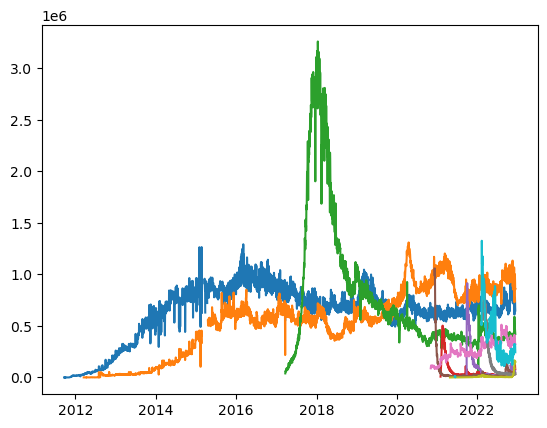

In [3]:
# The x-axis for the graph will be the date
x = player_count["DateTime"]

# The y-axis for the graph will be the player count
# Since we have 10 different games, there will be 10 different lines in the graph with their own y-value
# We will be taking the list of columns, minus DateTime
y = list(player_count.columns)
y.pop(0)

# We will create a plot line for each game
for game in y:
    plt.plot(x, player_count[game], label = game)

plt.show()

Now we can see a visualization of player count for each game, but we are missing some information on the graph. Let us complete the graph and make it easier to digest.

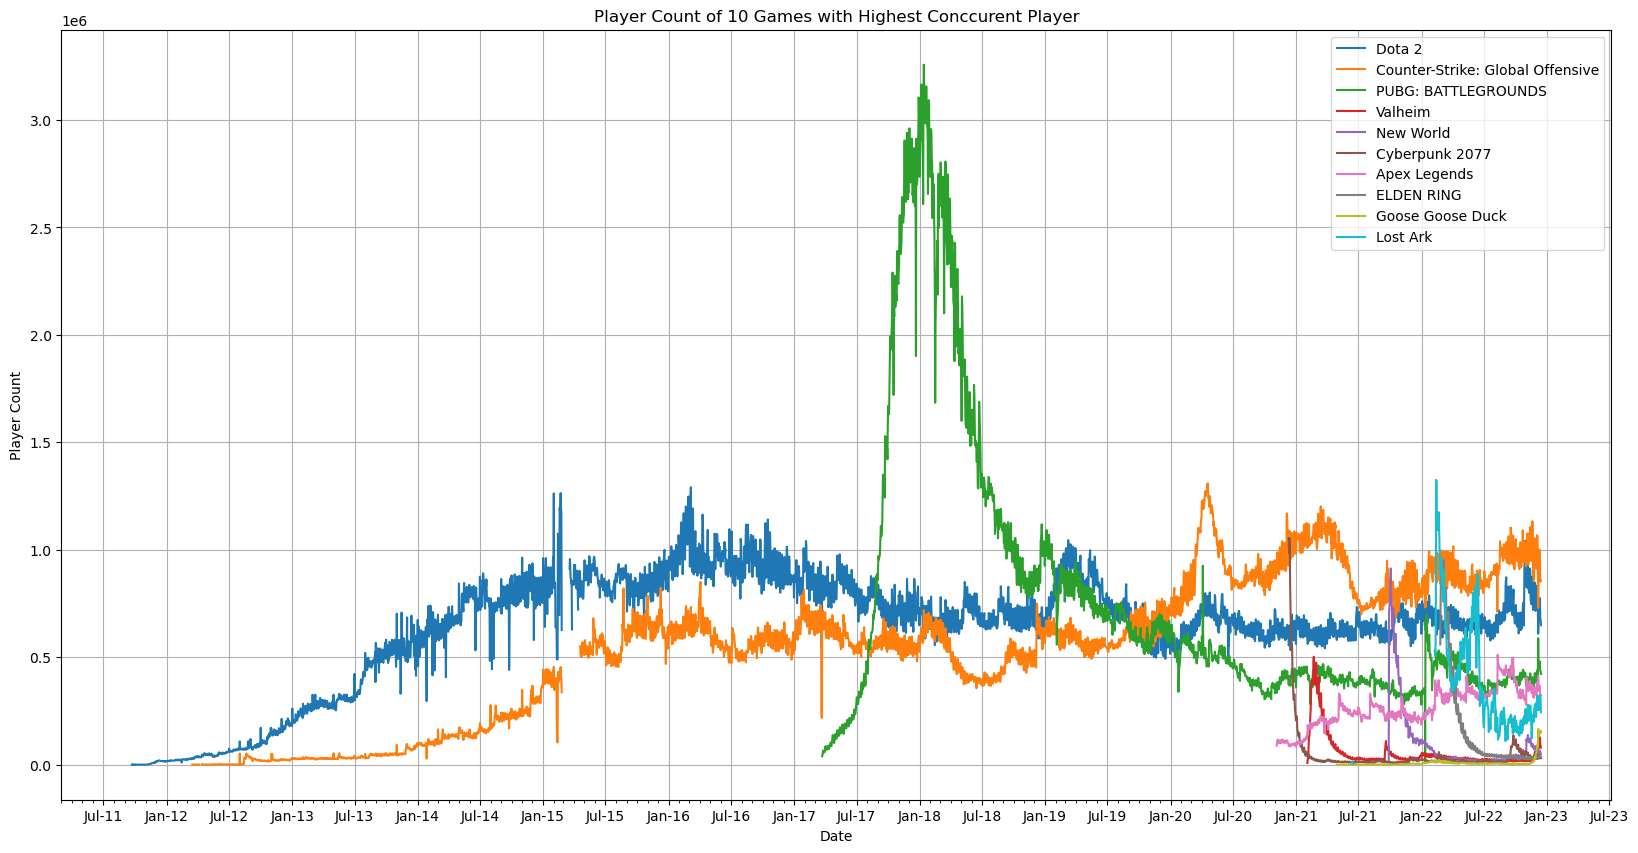

In [4]:
# Let us redo the plot generation
fig, ax = plt.subplots(figsize=(20, 10))

for game in y:
    ax.plot(x, player_count[game], label = game)
    
# Add a legend to the plot
ax.legend(loc="upper right")

# Set plot labels and add a title
ax.set(xlabel="Date", ylabel="Player Count",
       title="Player Count of 10 Games with Highest Conccurent Player")

ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7))) # set January and July as the major x-axis ticks
ax.xaxis.set_minor_locator(mdates.MonthLocator()) # Add minor ticks on every other months
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b-%y")) # set x-axis labels to month-year format
ax.grid(True) # show grids to allow easier viewing

plt.show()

There is not much to analyze based on this graph alone, but some key takeaways are:
1. Most games player count listed here decline to less than half of its peak player count in less than six months after reaching its peak
2. Exclusion to this rule are Dota 2 and Counter-Strike: Global Offensive, which has a steady or increasing player count
3. Adding extra context to this data, 9 out of 10 of the games listed here have multiplayer components (based on the game information its Steam page), with Cyberpunk 2077 being the only game that is strictly single-player

For now, let us dig deeper on point number 2. We found out that there are 2 different games that have a rather steady player count which continues for more than 10 years from the first data point. Let us find the similarities between both games, and see the differences when compared to other games in this list.

## The Method

Each games in this list are unique and it is very difficult to compare games objectively. One way we can compare similarities and differences between each games based on available data is by looking at user-defined tags for each game.

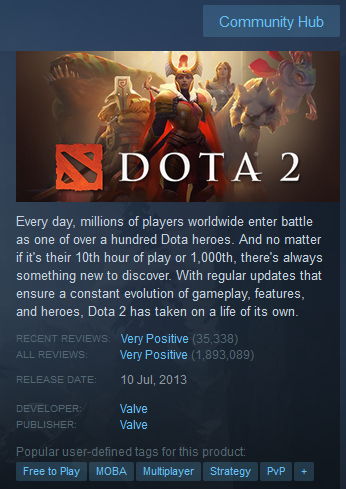

The Steam store page by default shows several popular user-defined tags for each game. We will compare all the user-defined tags (including those shown after clicking the plus button) on each game and see if we can find some insights and reach any conclusion.

In [5]:
url = "https://raw.githubusercontent.com/mezkymy/SteamDBAnalysis/main/game_tags.csv"
game_tags = pd.read_csv(url)
game_tags.describe()

,Game Title,Tags
count,176,176
unique,9,77
top,Dota 2,PvP
freq,20,8


Unfortunately, Lost Ark store page is inaccessible from my region. While it is possible to bypass this by using VPN, I would like to keep it simple for now and proceed with data from the remaining 9 games.

Using describe, we can see that there are 77 unique tags combined across 9 games, with the tag "PvP" appearing in 8 out of 9 games.

Let us plot a bar chart for each tags to visualize the distribution.

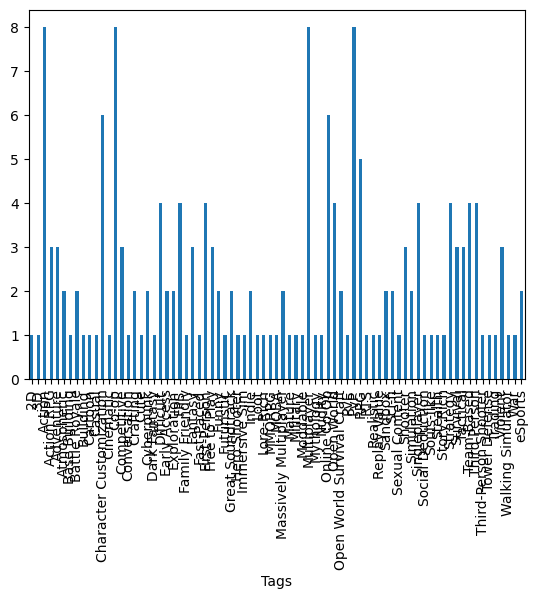

In [6]:
# First, we create a new series consisting of the tags and its number of occurence

tags_count = game_tags.groupby('Tags')["Game Title"].nunique()

# Create the plot bar
tags_count.plot.bar()
plt.show()

The chart is still messy, there are too many tags, and we can see that there are several tags that only appears once. Let us clean the chart and remove the tags that only appears once, since it shows that those tags bears low or no corellation at all to the high conccurent player count of the game.

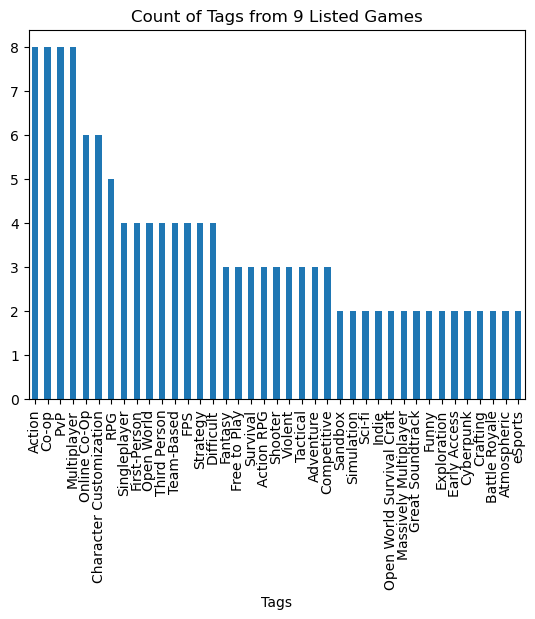

In [7]:
# Take only tags with a count above 1
tags_count_above_1 = tags_count[tags_count > 1]

# Sort the series based on its value, with descending order
tags_count_above_1.sort_values(ascending=False, inplace=True)

# Create plot bar
ax = tags_count_above_1.plot.bar()
ax.set_title("Count of Tags from 9 Listed Games")
plt.show()

From this simple bar chart, we can see that there are 4 tags that occurs 8 times out of 9 games on our list, which are:
1. Action
2. Co-op
3. PvP
4. Multiplayer

Now let us check the tags that occurs in both outlier games that have a steady player count; Dota 2 and Counter-Strike: Global Offensive

In [8]:
# Take only Dota 2 and Counter-Strike: Global Offensive from the game_tags dataframe
outliers = ["Dota 2", "Counter-Strike: Global Offensive"]
dota_csgo_only = game_tags.loc[game_tags['Game Title'].isin(outliers)]

# Find non-unique tags that appears in both games, turn into a list
dota_csgo_tags = dota_csgo_only[dota_csgo_only['Tags'].duplicated() == True]["Tags"].tolist()
print(dota_csgo_tags)

['Multiplayer', 'Competitive', 'Action', 'Team-Based', 'eSports', 'PvP', 'Online Co-Op', 'Co-op', 'Strategy', 'Difficult']


We found out that there are 10 tags that occurs on both games, but how many of those tags also appears in other games on the list?

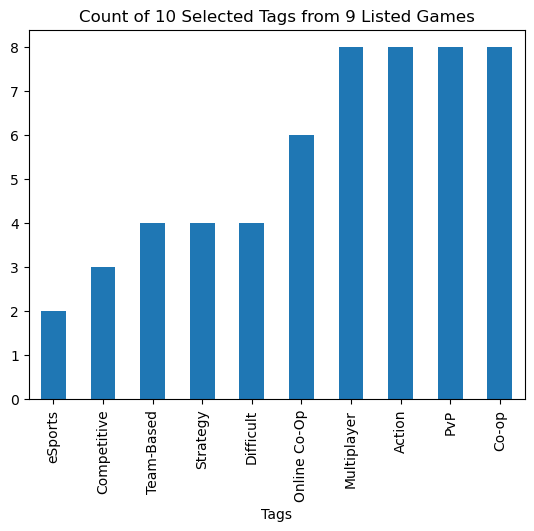

In [11]:
# Let us create another plot bar based on the tags_count_above_1 series,
# but only with the 10 tags we find in both Dota 2 and Counter-Strike: Global Offensive

tags_count_10 = tags_count_above_1[dota_csgo_tags]
tags_count_10.sort_values(ascending=True, inplace=True)
ax = tags_count_10.plot.bar()
ax.set_title("Count of 10 Selected Tags from 9 Listed Games")
plt.show()

From this simple bar chart, we found out that out of the 10 tags found in both Dota 2 and Counter-Strike: Global Offensive, only the tag "eSports" was found exclusively on both games out of the other 9 games in the list, since they only appear twice. This might show that games tagged as "eSports" will have a relatively more stable conccurent player count compared to other games.

## Conclusion

While the data and steps used in this analysis are simple and limited, we can take several conclusions:
1. 8 out of 10 Steam games at the top 10 highest concurrent player count decline to less than half of its peak player count in less than six months after reaching its peak conccurent player count.
2. Exclusion to this are Dota 2 and Counter-Strike: Global Offensive, which has a steady or increasing player count for more than 10 years.
3. Dota 2 and Counter-Strike: Global Offensive differs with the other games on the list (excluding Lost Ark, which store page is inaccessible from author's region) by being the only games that are tagged as "eSports" by the user, which might be related to its relatively stable player count.
4. There are four tags that appears in 8 out of 9 games on the list, which are: Action, Co-op, PvP, and Multiplayer. These tags might be correlated with the all-time high conccurent player count.

While these conclusions might prove to be interesting, bear in mind that the data we used are limited to the conccurent player count (not the total amount of players who owns the game or the total daily/weekly/monthly player count), and we only picked the top 10 games on the chart. Adding more data into the analysis and comparing with analysis based on the ownership or total daily/weekly/monthly player count might provide a better understanding and conclusion to this analysis.


Further discussion regarding to this analysis or suggestions to improve are welcome. Please send your message to mezkymy@gmail.com.